In [194]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.linear_model import LinearRegression
plt.rcParams["figure.figsize"] = (12,6)

In [195]:
df = pd.read_csv('Chicago_hotels.csv', sep =";", decimal=',', na_values=' ')
df.head()

,date1,date2,x1,x2,x3,x4
0,January,1994,44.3,104.04,51.9,72.15
1,February,1994,54.7,102.74,60.1,73.47
2,March,1994,61.9,105.23,65.0,74.91
3,April,1994,69.1,113.63,69.8,79.06
4,May,1994,70.8,120.77,72.4,82.07


In [196]:
df.describe()

,date2,x1,x2,x3,x4
count,120.000000,112.000000,112.000000,112.000000,112.000000
mean,1998.500000,70.679464,143.836339,67.632143,100.710536
std,2.884324,12.229054,22.477045,10.691499,14.271748
min,1994.000000,44.300000,102.740000,43.400000,72.150000
25%,1996.000000,59.600000,126.367500,58.675000,90.392500
50%,1998.500000,74.450000,142.755000,69.950000,100.860000
75%,2001.000000,79.850000,162.377500,76.875000,112.077500
max,2003.000000,88.900000,190.710000,83.500000,128.740000


Проверим четвертый столбец: никаких выбросов не наблюдается, пропусков тоже нет.

In [197]:
df1 = df.drop(["x1", "x2", "x3", "date2"], axis = 1)
df1.head()

,date1,x4
0,January,72.15
1,February,73.47
2,March,74.91
3,April,79.06
4,May,82.07


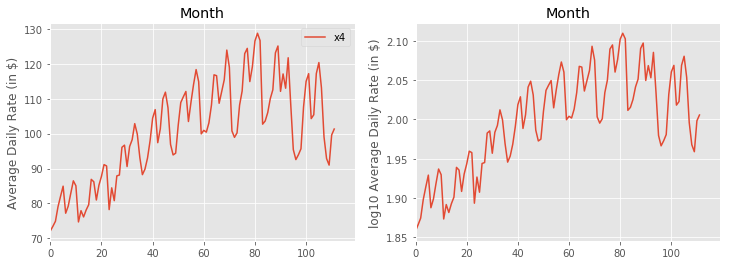

In [198]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df1.plot(ax=ax1)
ax1.set_title(u'Month')
ax1.set_ylabel(u'Average Daily Rate (in $)')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df1['x4'])).plot(ax=ax2)
ax2.set_title(u'Month')
ax2.set_ylabel(u'log10 Average Daily Rate (in $)')

In [199]:
df1[70:80]

,date1,x4
70,November,119.00
71,December,100.78
72,January,98.94
73,February,100.22
74,March,108.18
75,April,112.21
76,May,122.90
77,June,124.41
78,July,114.90
79,August,119.18


Выводы:
Видно, что ряд меняет свой тренд с возрастающего на убывающий. Значит нужно отрезать все данные соответствующие возрастающему тренду. Сезоность всех данных больше похожа на мультипликативною, чем на аддитивную, поэтому в дальнейшем будем работать с логарифмом данных.

In [200]:
df2 = df1[72:]

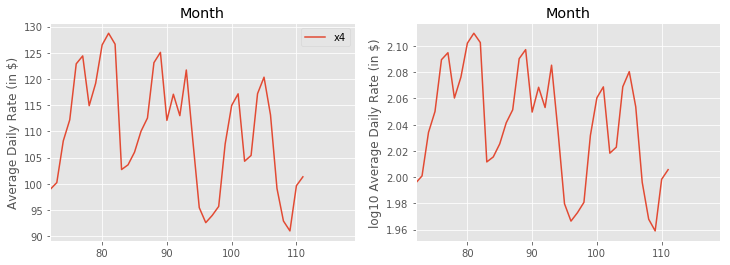

In [201]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df2.plot(ax=ax1)
ax1.set_title(u'Month')
ax1.set_ylabel(u'Average Daily Rate (in $)')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df2['x4'])).plot(ax=ax2)
ax2.set_title(u'Month')
ax2.set_ylabel(u'log10 Average Daily Rate (in $)')

Так как данных осталось мало, сложно определить какой тип имеет сезонность, будем считать что мультипликативная

In [202]:
df2['log_y'] = np.log10(df2['x4'])
df2['month_num'] = range(1, len(df2) + 1)
df2 = df2.drop(["date1", "x4"], axis = 1)
df2.head()

/Users/tihonvorobev/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tihonvorobev/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,log_y,month_num
72,1.995372,1
73,2.000954,2
74,2.034147,3
75,2.050032,4
76,2.089552,5


Добавим сезонные призника - месяца

In [203]:
df2["m01"] = [1,0,0,0,0,0,0,0,0,0,0,0]*4
df2["m02"] = [0,1,0,0,0,0,0,0,0,0,0,0]*4
df2["m03"] = [0,0,1,0,0,0,0,0,0,0,0,0]*4
df2["m04"] = [0,0,0,1,0,0,0,0,0,0,0,0]*4
df2["m05"] = [0,0,0,0,1,0,0,0,0,0,0,0]*4
df2["m06"] = [0,0,0,0,0,1,0,0,0,0,0,0]*4
df2["m07"] = [0,0,0,0,0,0,1,0,0,0,0,0]*4
df2["m08"] = [0,0,0,0,0,0,0,1,0,0,0,0]*4
df2["m09"] = [0,0,0,0,0,0,0,0,1,0,0,0]*4
df2["m10"] = [0,0,0,0,0,0,0,0,0,1,0,0]*4
df2["m11"] = [0,0,0,0,0,0,0,0,0,0,1,0]*4
df2["m12"] = [0,0,0,0,0,0,0,0,0,0,0,1]*4
df2.head(12)

,log_y,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
72,1.995372,1,1,0,0,0,0,0,0,0,0,0,0,0
73,2.000954,2,0,1,0,0,0,0,0,0,0,0,0,0
74,2.034147,3,0,0,1,0,0,0,0,0,0,0,0,0
75,2.050032,4,0,0,0,1,0,0,0,0,0,0,0,0
76,2.089552,5,0,0,0,0,1,0,0,0,0,0,0,0
77,2.094855,6,0,0,0,0,0,1,0,0,0,0,0,0
78,2.060320,7,0,0,0,0,0,0,1,0,0,0,0,0
79,2.076203,8,0,0,0,0,0,0,0,1,0,0,0,0
80,2.102125,9,0,0,0,0,0,0,0,0,1,0,0,0
81,2.109714,10,0,0,0,0,0,0,0,0,0,1,0,0


Убираем из данных один столбец, соответствующий базовому месяцу, (избавляемся от коллинеарности), так как сумма столбцов дает столбец из единиц, а он у нас есть (столбец констант), поэтому надо удалить, теперь получаем не сезонные поправки, а поправки относительно декабря

In [204]:
X = df2[:-8].drop(["log_y", "m12"], axis = 1)
y = df2[:-8]["log_y"]

In [205]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.90630014745501863

In [206]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,2.028712
1,month_num,-0.001372
2,m01,-0.016357
3,m02,-0.011719
4,m03,0.013770
5,m04,0.036197
6,m05,0.074737
7,m06,0.082944
8,m07,0.040088
9,m08,0.054577


In [207]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

In [208]:
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,2.028712,0.000000e+00
1,month_num,-0.001372,1.761990e-07
2,m01,-0.016357,1.789563e-01
3,m02,-0.011719,3.321682e-01
4,m03,0.013770,2.550663e-01
5,m04,0.036197,4.222924e-03
6,m05,0.074737,8.857860e-07
7,m06,0.082944,1.100923e-07
8,m07,0.040088,3.224963e-03
9,m08,0.054577,1.178013e-04


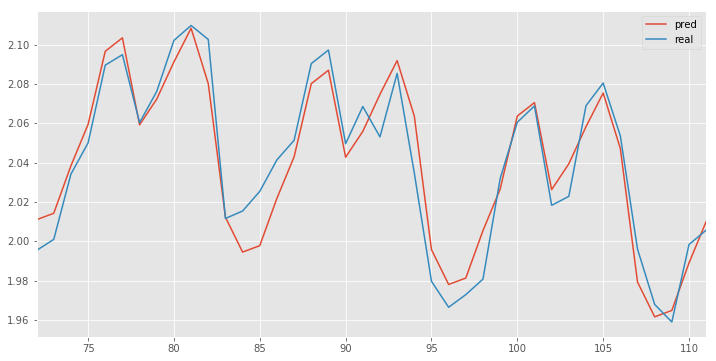

In [209]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [210]:
df3 = df2[-8:].drop(["log_y", "m12"], axis = 1)
df3

,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11
112,41,0,0,0,0,1,0,0,0,0,0,0
113,42,0,0,0,0,0,1,0,0,0,0,0
114,43,0,0,0,0,0,0,1,0,0,0,0
115,44,0,0,0,0,0,0,0,1,0,0,0
116,45,0,0,0,0,0,0,0,0,1,0,0
117,46,0,0,0,0,0,0,0,0,0,1,0
118,47,0,0,0,0,0,0,0,0,0,0,1
119,48,0,0,0,0,0,0,0,0,0,0,0


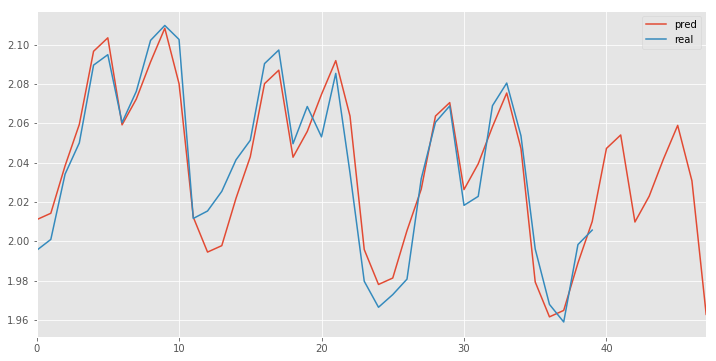

In [211]:
pred1 = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred2 = pd.DataFrame({
    'pred': model.predict(df3),
    'real': np.nan})
res = pd.concat([pred1, pred2]).reset_index(drop=True)
res.plot()

Модель уловила сезонность и убывающий тренд

Когда мы строили модель не все признаки являлись значимыми, поэтому попробуем их обединить, они соответсвуют затянувшийся зиме, и взять за базовый месяц сентябрь

In [212]:
df4 = df2
df4['winter_union'] = df2["m12"]+df2["m01"] + df2["m02"] + df2["m03"]
df4 = df4.drop(["m12","m01", "m02", "m03"], axis = 1)
df4.head()

,log_y,month_num,m04,m05,m06,m07,m08,m09,m10,m11,winter_union
72,1.995372,1,0,0,0,0,0,0,0,0,1
73,2.000954,2,0,0,0,0,0,0,0,0,1
74,2.034147,3,0,0,0,0,0,0,0,0,1
75,2.050032,4,1,0,0,0,0,0,0,0,0
76,2.089552,5,0,1,0,0,0,0,0,0,0


In [213]:
X = df4[:-8].drop(["log_y", "m10"], axis = 1)
y = df4[:-8]["log_y"]

In [214]:
model = LinearRegression()
model.fit(X, y)
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,2.121319,0.000000e+00
1,month_num,-0.001340,1.345048e-06
2,m04,-0.057109,8.151067e-05
3,m05,-0.018410,1.938984e-01
4,m06,-0.010235,4.662084e-01
5,m07,-0.053124,4.628658e-04
6,m08,-0.038666,8.225409e-03
7,m09,-0.018470,1.909946e-01
8,m11,-0.026844,6.038162e-02
9,winter_union,-0.097084,4.257461e-11


Анаогично получили незначимые сезонности, объединим осение месяца

In [215]:
df4['autumn_union'] = df2["m09"]+df2["m10"] + df2["m11"]
df4 = df4.drop(["m09","m10", "m11"], axis = 1)

In [216]:
X = df4[:-8].drop(["log_y", "m04"], axis = 1)
y = df4[:-8]["log_y"]

In [217]:
model = LinearRegression()
model.fit(X, y)
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,2.064315,0.000000
1,month_num,-0.001345,0.000002
2,m05,0.038675,0.006352
3,m06,0.046855,0.001181
4,m07,0.003971,0.768064
5,m08,0.018434,0.175565
6,winter_union,-0.039980,0.000227
7,autumn_union,0.042005,0.000275


In [218]:
df4['sammer_union'] = df2["m07"]+df2["m08"]
df4 = df4.drop(["m07","m08"], axis = 1)

In [219]:
X = df4[:-8].drop(["log_y", "m05"], axis = 1)
y = df4[:-8]["log_y"]

In [220]:
model = LinearRegression()
model.fit(X, y)
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,2.102920,0.000000e+00
1,month_num,-0.001341,2.201363e-06
2,m04,-0.038696,6.344598e-03
3,m06,0.008176,5.703239e-01
4,winter_union,-0.078671,1.624579e-08
5,autumn_union,0.003309,7.792270e-01
6,sammer_union,-0.027483,3.233121e-02


In [221]:
df4['spring_union'] = df2["m05"]+df2["m06"]
df4 = df4.drop(["m05","m06"], axis = 1)

In [222]:
X = df4[:-8].drop(["log_y", "m04"], axis = 1)
y = df4[:-8]["log_y"]

In [223]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.85531970812441449

Модель стала хуже, что не удвивительно

In [224]:
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,2.064172,0.000000
1,month_num,-0.001338,0.000002
2,winter_union,-0.039972,0.000203
3,autumn_union,0.042005,0.000246
4,sammer_union,0.011219,0.322530
5,spring_union,0.042794,0.000481


Ничего лучше не получим

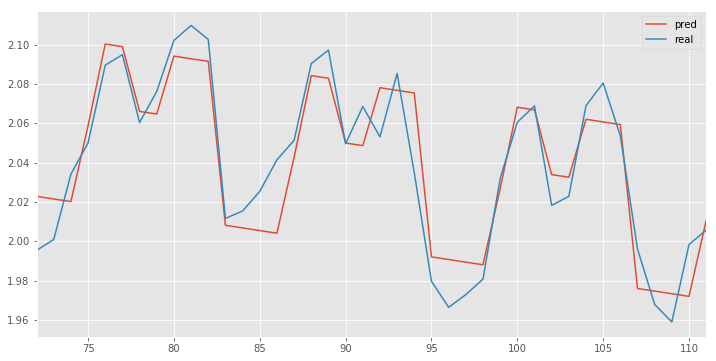

In [225]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [226]:
df5 = df4[-8:].drop(["log_y", "m04"], axis = 1)
df5

,month_num,winter_union,autumn_union,sammer_union,spring_union
112,41,0,0,0,1
113,42,0,0,0,1
114,43,0,0,1,0
115,44,0,0,1,0
116,45,0,1,0,0
117,46,0,1,0,0
118,47,0,1,0,0
119,48,1,0,0,0


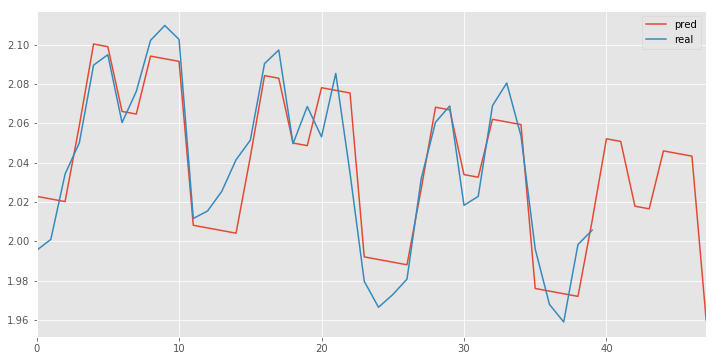

In [227]:
pred1 = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred2 = pd.DataFrame({
    'pred': model.predict(df5),
    'real': np.nan})
res = pd.concat([pred1, pred2]).reset_index(drop=True)
res.plot()

Получили более простую и с большими ошибками модель, но она также уловила тренд и сезонность

Давайте ради интереса попробуем построить зависимость от квдрата времени для всех данных.

In [228]:
df6 = df1
df6['log_y'] = np.log10(df1['x4'])
df6['month_num'] = range(1, len(df6) + 1)
df6['month_num_sq'] = np.array([i*i for i in range(1, len(df6) + 1)])
df6 = df6.drop(["date1", "x4"], axis = 1)
df6.head()

,log_y,month_num,month_num_sq
0,1.858236,1,1
1,1.866110,2,4
2,1.874540,3,9
3,1.897957,4,16
4,1.914184,5,25


In [229]:
df6["m01"] = [1,0,0,0,0,0,0,0,0,0,0,0]*10
df6["m02"] = [0,1,0,0,0,0,0,0,0,0,0,0]*10
df6["m03"] = [0,0,1,0,0,0,0,0,0,0,0,0]*10
df6["m04"] = [0,0,0,1,0,0,0,0,0,0,0,0]*10
df6["m05"] = [0,0,0,0,1,0,0,0,0,0,0,0]*10
df6["m06"] = [0,0,0,0,0,1,0,0,0,0,0,0]*10
df6["m07"] = [0,0,0,0,0,0,1,0,0,0,0,0]*10
df6["m08"] = [0,0,0,0,0,0,0,1,0,0,0,0]*10
df6["m09"] = [0,0,0,0,0,0,0,0,1,0,0,0]*10
df6["m10"] = [0,0,0,0,0,0,0,0,0,1,0,0]*10
df6["m11"] = [0,0,0,0,0,0,0,0,0,0,1,0]*10
df6["m12"] = [0,0,0,0,0,0,0,0,0,0,0,1]*10
df6.head(12)

,log_y,month_num,month_num_sq,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,1.858236,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1.866110,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,1.874540,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,1.897957,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,1.914184,5,25,0,0,0,0,1,0,0,0,0,0,0,0
5,1.929215,6,36,0,0,0,0,0,1,0,0,0,0,0,0
6,1.887730,7,49,0,0,0,0,0,0,1,0,0,0,0,0
7,1.898999,8,64,0,0,0,0,0,0,0,1,0,0,0,0
8,1.918712,9,81,0,0,0,0,0,0,0,0,1,0,0,0
9,1.936966,10,100,0,0,0,0,0,0,0,0,0,1,0,0


In [230]:
X = df6[:-8].drop(["log_y", "m12"], axis = 1)
y = df6[:-8]["log_y"]

In [231]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.94354413589633457

R^2 стал немного лучше относительно первой модели, но это не всегда показатель качества

In [232]:
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,1.819005,0.000000e+00
1,month_num,0.004670,0.000000e+00
2,month_num_sq,-0.000029,0.000000e+00
3,m01,-0.000291,9.682206e-01
4,m02,-0.001838,8.016513e-01
5,m03,0.018163,1.428474e-02
6,m04,0.035547,3.696262e-06
7,m05,0.064760,4.374279e-14
8,m06,0.068714,2.664535e-15
9,m07,0.029941,1.133083e-04


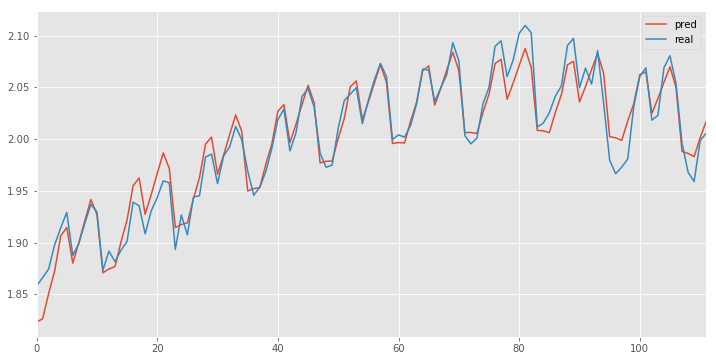

In [233]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [234]:
df7 = df6[-8:].drop(["log_y", "m12"], axis = 1)
df7

,month_num,month_num_sq,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11
112,113,12769,0,0,0,0,1,0,0,0,0,0,0
113,114,12996,0,0,0,0,0,1,0,0,0,0,0
114,115,13225,0,0,0,0,0,0,1,0,0,0,0
115,116,13456,0,0,0,0,0,0,0,1,0,0,0
116,117,13689,0,0,0,0,0,0,0,0,1,0,0
117,118,13924,0,0,0,0,0,0,0,0,0,1,0
118,119,14161,0,0,0,0,0,0,0,0,0,0,1
119,120,14400,0,0,0,0,0,0,0,0,0,0,0


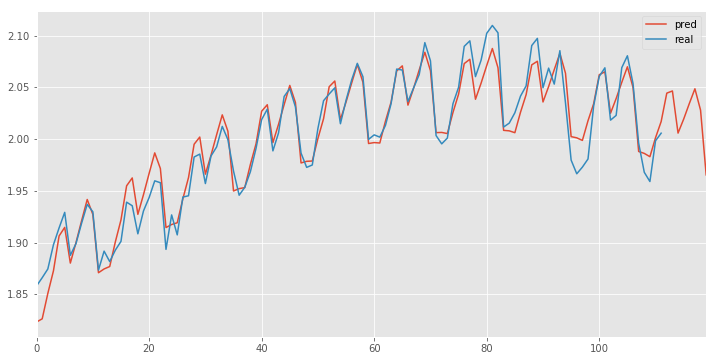

In [235]:
pred1 = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred2 = pd.DataFrame({
    'pred': model.predict(df7),
    'real': np.nan})
res = pd.concat([pred1, pred2]).reset_index(drop=True)
res.plot()

Вышло неплохо, может быть так даже лучше делать, так как гостиничный бизнес не сильно меняется за 10 лет.
Давайте попробуем аналогично упростить модель убрав все незначимые сезонности.

In [236]:
df8 = df6.drop(["m01", "m02", "m03", "m05", "m06", "m07", "m08", "m09", "m10", "m11", "m12"], axis=1)
df8['winter_union'] = df6["m12"] + df6["m01"] + df6["m02"] + df6["m03"]
df8['spring_union'] = df6["m05"] + df6["m06"]
df8['sammer_union'] = df6["m07"] + df6["m08"]
df8['autumn_union'] = df6["m09"] + df6["m10"] + df6["m11"]
df8.head()

,log_y,month_num,month_num_sq,m04,winter_union,spring_union,sammer_union,autumn_union
0,1.858236,1,1,0,1,0,0,0
1,1.866110,2,4,0,1,0,0,0
2,1.874540,3,9,0,1,0,0,0
3,1.897957,4,16,1,0,0,0,0
4,1.914184,5,25,0,0,1,0,0


In [237]:
X = df8[:-8].drop(["log_y", "m04"], axis = 1)
y = df8[:-8]["log_y"]

In [238]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.93069838829412199

Модель стало ненамного хуже, при этом количество объясняемых перменных значительно уменьшилось

In [239]:
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,1.854654,0.000000e+00
1,month_num,0.004662,0.000000e+00
2,month_num_sq,-0.000029,0.000000e+00
3,winter_union,-0.031431,8.384139e-07
4,spring_union,0.031211,9.214541e-06
5,sammer_union,0.002153,7.489686e-01
6,autumn_union,0.031668,1.919445e-06


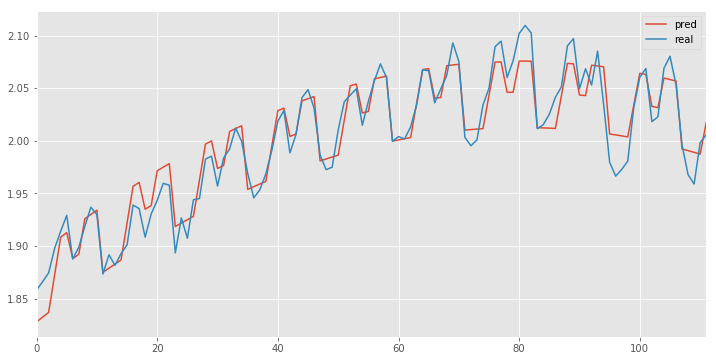

In [240]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [241]:
df9 = df8[-8:].drop(["log_y", "m04"], axis = 1)
df9

,month_num,month_num_sq,winter_union,spring_union,sammer_union,autumn_union
112,113,12769,0,1,0,0
113,114,12996,0,1,0,0
114,115,13225,0,0,1,0
115,116,13456,0,0,1,0
116,117,13689,0,0,0,1
117,118,13924,0,0,0,1
118,119,14161,0,0,0,1
119,120,14400,1,0,0,0


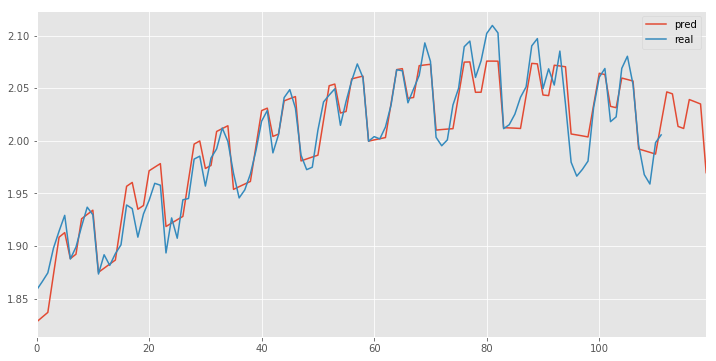

In [242]:
pred1 = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred2 = pd.DataFrame({
    'pred': model.predict(df9),
    'real': np.nan})
res = pd.concat([pred1, pred2]).reset_index(drop=True)
res.plot()

Модель уловила тренд и сезонность, но так как данные после логарифмирования не сильно сгладились, то есть ошибки модели, но R^2 говорит, что эта модель лучше первой.